

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [116]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

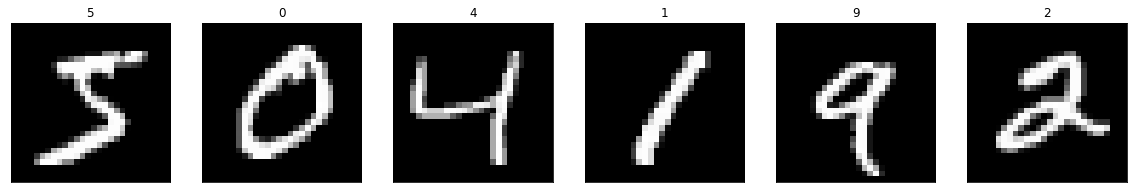

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

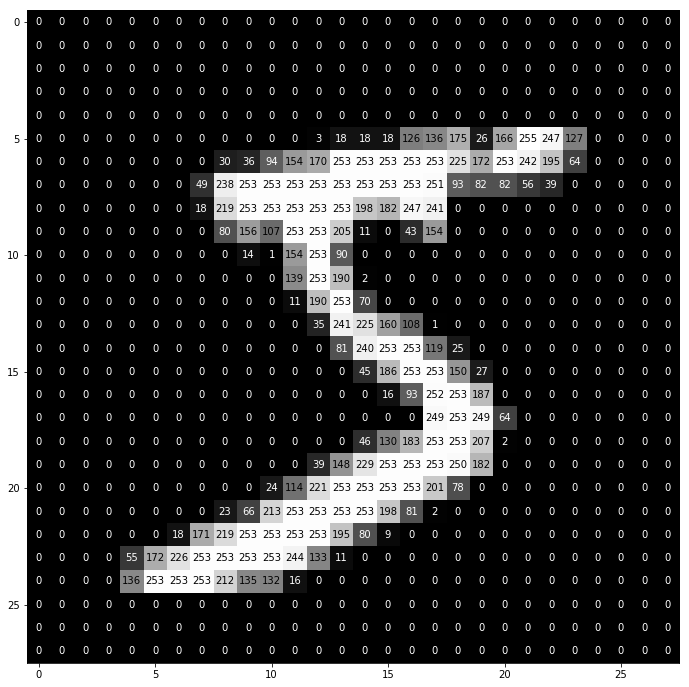

In [118]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [119]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [120]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### 6. Define the Model Architecture

In [121]:
X_train.shape

(60000, 28, 28)

In [122]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### 7. Compile the Model

In [123]:
# compile the model
model.compile(loss='categorical_crossentropy', 
              #optimizer='sgd', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [124]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=2)
accuracy = 100*score[1]
print(score)
# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

[2.31638822555542, 0.1174]
Test accuracy: 11.7400%


### 9. Train the Model

In [130]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=24, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 44s 911us/step - loss: 0.1125 - acc: 0.9686 - val_loss: 0.1627 - val_acc: 0.9616
Epoch 2/10
48000/48000 [==============================] - 43s 899us/step - loss: 0.1029 - acc: 0.9743 - val_loss: 0.1598 - val_acc: 0.9687
Epoch 3/10
48000/48000 [==============================] - 44s 925us/step - loss: 0.1003 - acc: 0.9780 - val_loss: 0.1277 - val_acc: 0.9757
Epoch 4/10
48000/48000 [==============================] - 43s 892us/step - loss: 0.0935 - acc: 0.9801 - val_loss: 0.1424 - val_acc: 0.9756
Epoch 5/10
48000/48000 [==============================] - 46s 957us/step - loss: 0.1002 - acc: 0.9802 - val_loss: 0.1836 - val_acc: 0.9739
Epoch 6/10
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0957 - acc: 0.9822 - val_loss: 0.1445 - val_acc: 0.9798
Epoch 7/10
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0942 - acc: 0.9829 - val_loss: 0.1626

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [126]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [127]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.9000%


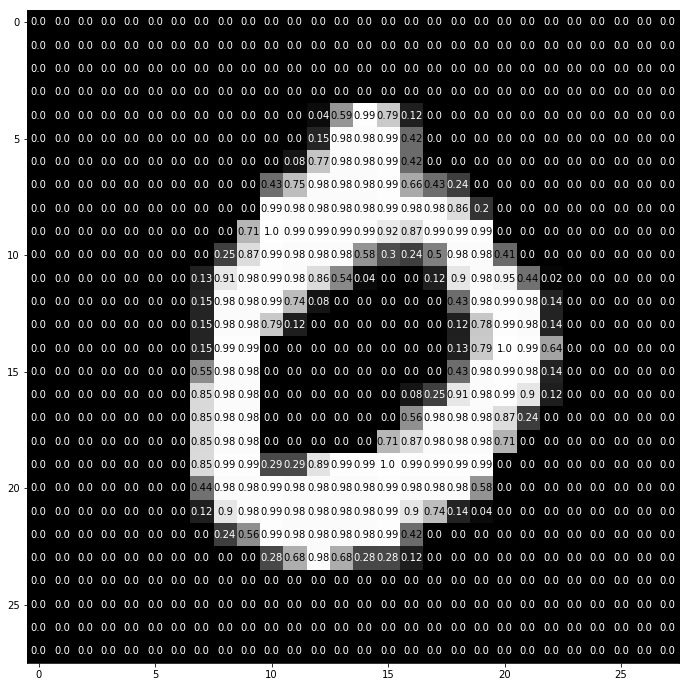

In [128]:

fig1 = plt.figure(figsize = (12,12)) 
ax1 = fig1.add_subplot(111)
visualize_input(X_test[3], ax1)


In [129]:
print(model.predict(X_test)[3])

[  9.99977589e-01   2.44350929e-07   4.76854666e-06   4.73659071e-07
   8.84248195e-08   1.70894467e-07   9.82146230e-06   6.44146212e-07
   5.08576754e-08   6.26070414e-06]
